# Problem Statement
Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.passengers and crew.

# Identify-the-Sentiments
Provided with tweet data to predict sentiment on electronic products of netizens.

**Note :-** Most profane and vulgar terms in the tweets have been replaced with “$&@*#”. However, please note that the dataset still might contain text that may be considered profane, vulgar, or offensive.

# Section 1: Import Library

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from sklearn.naive_bayes  import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.notebook_repr_html', True)

# Section 2: Read Data

In [2]:
# reading dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# concatenating both datasets
df = pd.concat([train, test])
df.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...


In [3]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [5]:
# checking for shape
print(train.shape, test.shape, df.shape)

(7920, 3) (1953, 2) (9873, 3)


In [6]:
df.describe()

,id,label
count,9873.000000,7920.000000
mean,4937.000000,0.255808
std,2850.233938,0.436342
min,1.000000,0.000000
25%,2469.000000,0.000000
50%,4937.000000,0.000000
75%,7405.000000,1.000000
max,9873.000000,1.000000


In [7]:
# checking dtypes
df.dtypes

id         int64
label    float64
tweet     object
dtype: object

In [8]:
df.isnull().sum()

id          0
label    1953
tweet       0
dtype: int64

# Section 3: EDA and Feature Generation

In [9]:
# Checking unique labels
df['label'].value_counts()

0.0    5894
1.0    2026
Name: label, dtype: int64

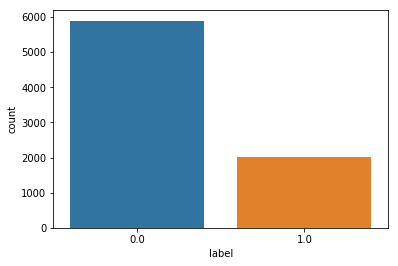

In [10]:
# Ploting unique labels
sns.countplot(x='label', data=df)

In [3]:
# Cleaning Raw tweets
def clean_text(text):
    
    #remove emails
    text = ' '.join([i for i in text.split() if '@' not in i])
    
    #remove web address
    text = re.sub('http[s]?://\S+', '', text)
    
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    #Convert to lowercase to maintain consistency
    text = text.lower()
    
    #remove double spaces 
    text = re.sub('\s+', ' ',text)
    
    return text

df["clean_tweet"] = df.tweet.apply(lambda x: clean_text(x))

In [4]:
#defining stop words
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

In [5]:
# Remove stopwords from all the tweets
df['cleaned_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))

In [6]:
#Adding New feature length of Tweet
df['word_count']=df.cleaned_tweet.str.split().apply(lambda x: len(x))

In [7]:
#Adding New Feature Polarity Score
sid= SentimentIntensityAnalyzer()
sid.polarity_scores(df.iloc[0]['cleaned_tweet'])
df['scores'] =df['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))
df['compound'] =df['scores'].apply(lambda d:d['compound'])
df['comp_score'] = df['compound'].apply(lambda score: '0' if score>=0 else '1')

In [80]:
# Remove unnecessary
ndf=df.copy()
ndf = ndf.drop(['tweet','clean_tweet','scores','compound','word_count','comp_score'], axis = 1) 

In [81]:
ndf.head()

,id,label,cleaned_tweet
0,1,0.0,fingerprint pregnancy test android apps beauti...
1,2,0.0,finally transparant silicon case thanks uncle ...
2,3,0.0,love go talk makememories unplug relax iphone ...
3,4,0.0,wired know george made way iphone cute daventr...
4,5,1.0,amazing service apple even talk question unles...


# Section 4: Model Building

In [82]:
# Seperating Train and Test Set
train_set = ndf[~ndf.label.isnull()]
test_set = ndf[ndf.label.isnull()]

In [83]:
# Shape
print(train_set.shape,test_set.shape)

(7920, 3) (1953, 3)


In [84]:
# Defining X and Y
X = train_set.drop(['label'], axis=1)
y = train_set.label
# Droping target columns
test_set = test_set.drop(['label'], axis=1)

In [85]:
X=X['cleaned_tweet'].astype(str)

In [86]:
#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3)

To perform further analysis we need to transform our data into a format that can be processed by our machine learning models.

- **CountVectorizer** does text preprocessing, tokenizing and filtering of stopwords and it builds a dictionary of features and transform documents to feature vectors.
- **TfidfTransformer** transforms the above vector by dividing the number of occurrences of each word in a document by the total number of words in the document. These new features are called tf for Term Frequencies.

In [87]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5544,) (2376,) (5544,) (2376,)


In [88]:
from sklearn.feature_extraction.text import TfidfTransformer

vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

### Random Forest

In [89]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train_dtm,y_train)
rf = model.predict(X_test_dtm)
print("Accuracy:",accuracy_score(y_test,rf)*100,"%")

Accuracy: 86.65824915824916 %


Normalized confusion matrix
[[0.95 0.05]
 [0.37 0.63]]


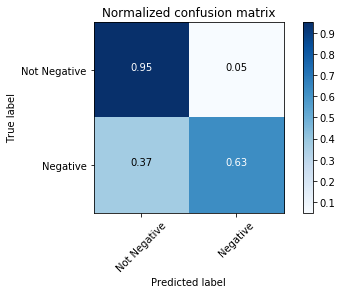

              precision    recall  f1-score   support

Not Negative       0.88      0.95      0.91      1765
    Negative       0.81      0.63      0.71       611

   micro avg       0.87      0.87      0.87      2376
   macro avg       0.85      0.79      0.81      2376
weighted avg       0.86      0.87      0.86      2376



In [93]:
import itertools  
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf)

np.set_printoptions(precision=2)
class_names = ['Not Negative','Negative']
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, rf, target_names=class_names)
print(eval_metrics)